### **California Housing Price Prediction**

In [4]:
import numpy as np
import pandas as pd

In [12]:
# dataset from sklearn
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

In [19]:
data_features = pd.DataFrame(housing.data, columns=housing.feature_names)

In [37]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [20]:
data_features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [23]:
target = pd.DataFrame(housing.target,columns=housing.target_names)
target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [30]:
df = pd.concat([data_features,target], axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [34]:
df.columns = df.columns.str.lower()

#### Exploratory analysis


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   medinc       20640 non-null  float64
 1   houseage     20640 non-null  float64
 2   averooms     20640 non-null  float64
 3   avebedrms    20640 non-null  float64
 4   population   20640 non-null  float64
 5   aveoccup     20640 non-null  float64
 6   latitude     20640 non-null  float64
 7   longitude    20640 non-null  float64
 8   medhouseval  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [38]:
for i in df.columns:
    print(i)
    print(df[i].unique()[:5])
    print(df[i].nunique())
    print()

medinc
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

houseage
[41. 21. 52. 42. 50.]
52

averooms
[6.98412698 6.23813708 8.28813559 5.8173516  6.28185328]
19392

avebedrms
[1.02380952 0.97188049 1.07344633 1.07305936 1.08108108]
14233

population
[ 322. 2401.  496.  558.  565.]
3888

aveoccup
[2.55555556 2.10984183 2.80225989 2.54794521 2.18146718]
18841

latitude
[37.88 37.86 37.85 37.84 37.83]
862

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

medhouseval
[4.526 3.585 3.521 3.413 3.422]
3842



In [39]:
## distribution price
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

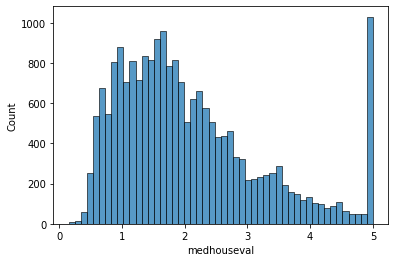

In [43]:
sns.histplot(df.medhouseval,bins=50);

#### Setting up the valiation framework

In [46]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [47]:
n_train,n_test,n_val

(12384, 4128, 4128)

In [49]:
#subset dataset

#shuffle the dataset
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_val + n_train:]]

In [51]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_val = df_test.reset_index(drop=True)

In [52]:
# collect our target variable

y_train = (df_train.medhouseval.values)
y_val = (df_val.medhouseval.values)
y_test = (df_test.medhouseval.values)

In [54]:
del df_train['medhouseval']
del df_test['medhouseval']
del df_val['medhouseval']

#### Linear Regression

In [55]:
def dot(xi, w):
    n = len(xi)

    res = 0.0 

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [56]:
def train_linear_regression(X,y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X]).round()

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [63]:
base = list(df_train.columns)
base.pop(6)
base.pop(6)
base

['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup']

In [66]:
X_train = df_train[base].values
X_train

array([[6.41140000e+00, 1.50000000e+01, 7.52755906e+00, 1.04986877e+00,
        2.52900000e+03, 3.31889764e+00],
       [4.18430000e+00, 1.20000000e+01, 6.33008357e+00, 1.04178273e+00,
        2.03300000e+03, 2.83147632e+00],
       [1.74110000e+00, 3.50000000e+01, 5.36915888e+00, 1.29439252e+00,
        9.09000000e+02, 4.24766355e+00],
       ...,
       [6.22100000e+00, 5.20000000e+01, 6.57142857e+00, 9.66666667e-01,
        5.30000000e+02, 2.52380952e+00],
       [4.60710000e+00, 5.20000000e+01, 6.03018868e+00, 1.07547170e+00,
        6.89000000e+02, 2.60000000e+00],
       [4.63660000e+00, 4.00000000e+01, 5.31176471e+00, 1.02156863e+00,
        1.15600000e+03, 2.26666667e+00]])

In [67]:
w0,w = train_linear_regression(X_train,y_train)

In [68]:
y_pred = w0 + X_train.dot(w)

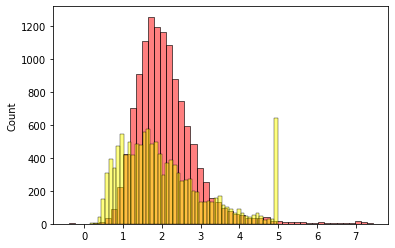

In [69]:
sns.histplot(y_pred, color="red", alpha=0.5, bins = 50)
sns.histplot(y_train, color = "yellow", alpha=0.5,bins = 50);

In [70]:
# function to calculate the root mean squared error
def rmse(y,y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [71]:
rmse(y_train,y_pred)

0.7905961354545004

#### Model validation

In [76]:
def prepare_x(df):

    features = base + ['longitude','latitude']
    
    df_num = df[features]
    
    X = df_num.values

    return X

In [77]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.7493946897414425

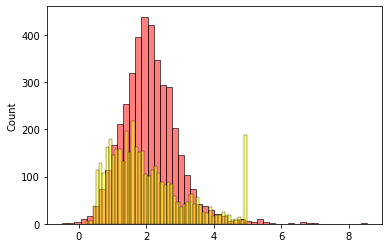

In [78]:
sns.histplot(y_pred, color="red", alpha=0.5, bins = 50)
sns.histplot(y_val, color = "yellow", alpha=0.5,bins = 50);

In [79]:
# regilarization
def train_linear_regression_reg(X,y,r = 0.01):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X]).round()

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [80]:
# fine tuning the model
for r in [0.0,0.00001,0.0001,0.001,0.1,1,10]:

    X_train = prepare_x(df_train)
    w0,w = train_linear_regression_reg(X_train,y_train, r=0.01)

    X_val = prepare_x(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)

    print(r,w0,score)

0.0 -28.857460627750648 0.7494597737815907
1e-05 -28.857460627750648 0.7494597737815907
0.0001 -28.857460627750648 0.7494597737815907
0.001 -28.857460627750648 0.7494597737815907
0.1 -28.857460627750648 0.7494597737815907
1 -28.857460627750648 0.7494597737815907
10 -28.857460627750648 0.7494597737815907
